# Medikal Maliyet Analizi Projesi

Veri seti: https://www.kaggle.com/datasets/mirichoi0218/insurance 

Projenin amacı, verilen değişkenlere göre bir kişinin sağlık sigortasının yaklaşık ne kadar masraflı olacağını tahmin etmektir.

## Gerekli kütüphanelerin eklenmesi:

In [106]:
# genel kullanılacak kütüphanelerin kullanılması 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# sklearn kütüphanesinin eklenmesi 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score

## Veri setinin okunması ve veriden anlamlı bilgi çıkarılması:

In [108]:
# Datasetinin okunması 
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
data.info()
# hiç null değer yokmuş 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
data.describe().T
# buradan verinin homojen dağılmış olduğunu anlıyorum 

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


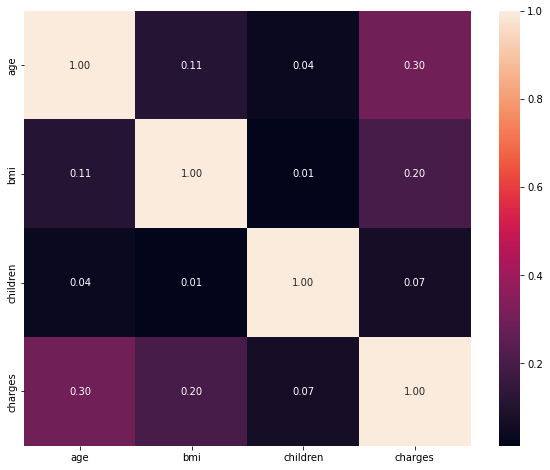

In [111]:
# Heatmap ile feature'lar arasındaki korelasyonu inceleyelim
corr = data.corr()
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.heatmap(corr, annot=True, fmt=".2f")

Veri görselleştirmesi ile veri analizi yapılması:

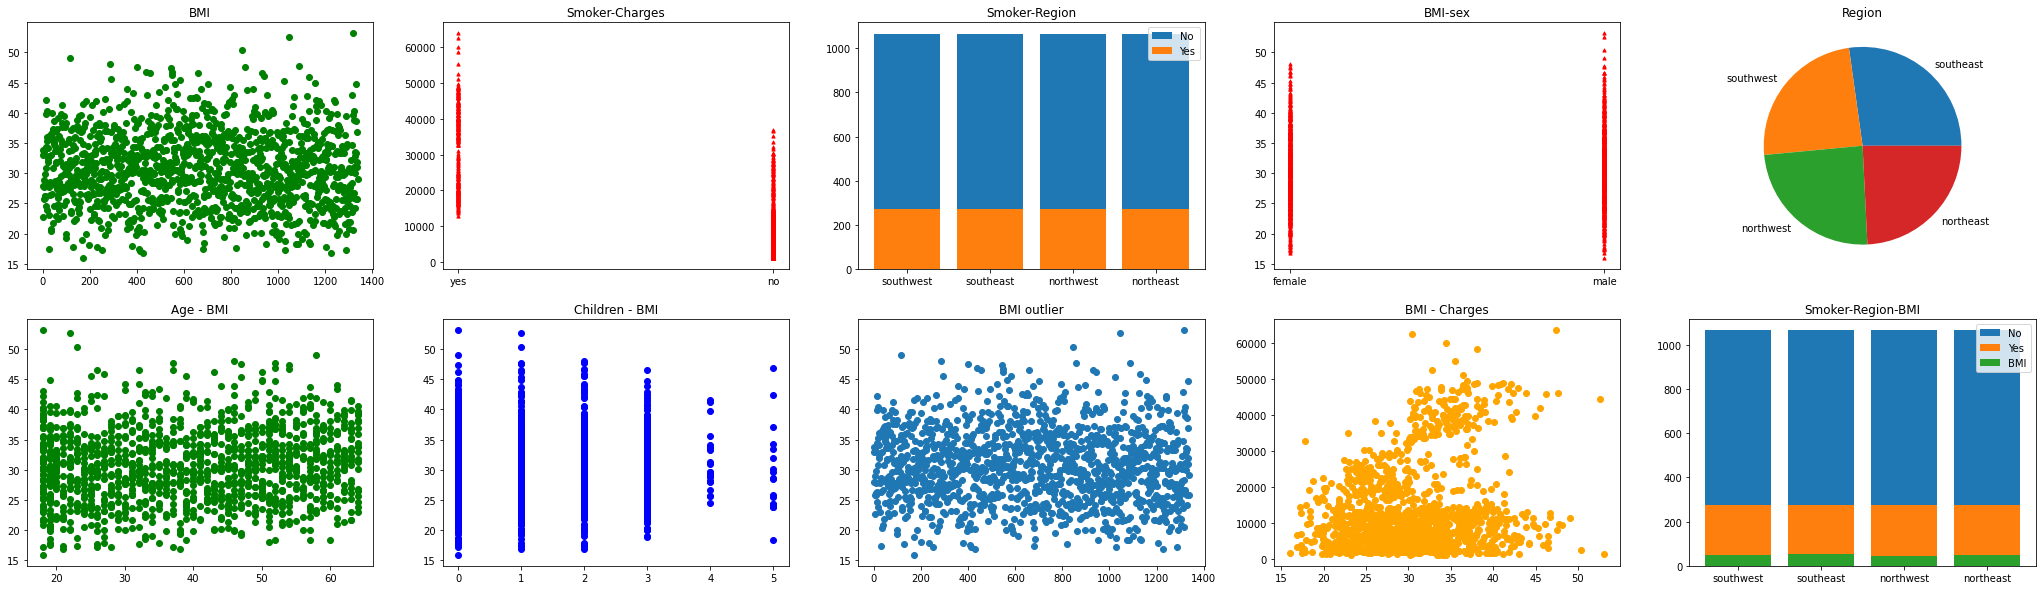

In [112]:
fig = plt.figure(figsize = (36,10))

# BMI verilerinin dağılımının incelenmesi
f1 = fig.add_subplot(2, 5, 1)
f1.scatter(range(0, len(data["bmi"])), data["bmi"], color="green")
f1.set_title("BMI")

# Smoker ile charges arasondaki ilişki
f2 = fig.add_subplot(2, 5, 2)
f2.scatter(data["smoker"], data["charges"], marker="^", s = 10, color="red")
f2.set_title("Smoker-Charges")

# Smoker ile region arasındaki ilişki
classes3 =  data["smoker"].value_counts()
f3 = fig.add_subplot(2, 5, 3)
f3.bar(data["region"], classes3["no"], label = "No")
f3.bar(data["region"], classes3["yes"], label = "Yes")
f3.legend()
f3.set_title("Smoker-Region")

# BMI ile sex arasındaki ilişki
f4 = fig.add_subplot(2, 5, 4)
f4.scatter(data["sex"], data["bmi"], marker="^", s = 10, color="red")
f4.set_title("BMI-sex")

# Region dağılımı 
f5 = fig.add_subplot(2, 5, 5)
regions = data["region"].value_counts()
f5.pie(regions, labels = regions.index)
f5.set_title("Region")

# Age ile BMI arasındaki ilişki 
f6 = fig.add_subplot(2, 5, 6)
f6.scatter(data["age"], data["bmi"], color="green")
f6.set_title("Age - BMI")

# BMI ile children arasındaki ilişki 
f7 = fig.add_subplot(2, 5, 7)
f7.scatter(data["children"], data["bmi"], color="blue")
f7.set_title("Children - BMI")

# BMI değişkeninde outlier var mı?
f8 = fig.add_subplot(2, 5, 8)
f8.scatter(range(0, len(data["bmi"])), data["bmi"])
f8.set_title("BMI outlier")

# BMI ile charges arasındaki ilişki 
f9 = fig.add_subplot(2, 5, 9)
f9.scatter(data["bmi"], data["charges"], color="orange")
f9.set_title("BMI - Charges")

# Region, smoker ve BMI arasındaki ilişki bar plot halinde
f10 = fig.add_subplot(2, 5, 10)
f10.bar(data["region"], classes3["no"], label = "No")
f10.bar(data["region"], classes3["yes"], label = "Yes")
f10.bar(data["region"], data["bmi"], label = "BMI")
f10.legend()
f10.set_title("Smoker-Region-BMI")

fig.show()

## Veri ön işleme yapılması:

One Hot Encoder ile string / kategorik değişkenlerin sayısal değerlere dönüştürülmesi

In [113]:
ohe = OneHotEncoder()
tf_sex = ohe.fit_transform(data[["sex"]])
tf_sex = tf_sex.toarray()

tf_smoker = ohe.fit_transform(data[["smoker"]])
tf_smoker = tf_smoker.toarray()

tf_region = ohe.fit_transform(data[["region"]])
tf_region = tf_region.toarray()

print("sex")
print(data["sex"], tf_sex)
print("\nsmoker")
print(data["smoker"], tf_smoker)
print("\nregion")
print(data["region"], tf_smoker)

sex
0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]

smoker
0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]

region
0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [114]:
data["sex"] = tf_sex
data["smoker"] = tf_smoker
data["region"] = tf_region

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,0.0,16884.92400
1,18,0.0,33.770,1,1.0,0.0,1725.55230
2,28,0.0,33.000,3,1.0,0.0,4449.46200
3,33,0.0,22.705,0,1.0,0.0,21984.47061
4,32,0.0,28.880,0,1.0,0.0,3866.85520
5,31,1.0,25.740,0,1.0,0.0,3756.62160
6,46,1.0,33.440,1,1.0,0.0,8240.58960
7,37,1.0,27.740,3,1.0,0.0,7281.50560
8,37,0.0,29.830,2,1.0,1.0,6406.41070
9,60,1.0,25.840,0,1.0,0.0,28923.13692


In [115]:
X = data.drop("charges", axis=1)
y = data["charges"]

print("***** X ******")
print(X.head())
print("\n***** y ******")
print(y.head())

***** X ******
   age  sex     bmi  children  smoker  region
0   19  1.0  27.900         0     0.0     0.0
1   18  0.0  33.770         1     1.0     0.0
2   28  0.0  33.000         3     1.0     0.0
3   33  0.0  22.705         0     1.0     0.0
4   32  0.0  28.880         0     1.0     0.0

***** y ******
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [116]:
# Train ve test setlerine ayırmak
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Veri setini normalize etmek

In [117]:
# One Hot Encoder yaptığımız veriler normalize edilmez
sc = MinMaxScaler(feature_range=(0, 1))
X_train["age"] = sc.fit_transform(X_train[["age"]])
X_train["bmi"] = sc.fit_transform(X_train[["bmi"]])
X_train["children"] = sc.fit_transform(X_train[["children"]])

X_train.head(15)

,age,sex,bmi,children,smoker,region
560,0.608696,1.0,0.107345,0.4,1.0,0.0
1285,0.630435,1.0,0.224913,0.0,1.0,1.0
1142,0.739130,1.0,0.239440,0.0,1.0,0.0
969,0.456522,1.0,0.493947,1.0,1.0,0.0
486,0.782609,1.0,0.148238,0.6,1.0,0.0
170,0.978261,0.0,0.686306,0.0,1.0,0.0
277,0.086957,1.0,0.224374,0.0,1.0,0.0
1033,0.000000,0.0,0.150794,0.0,0.0,1.0
209,0.478261,0.0,0.679849,0.2,1.0,1.0
947,0.413043,0.0,0.490718,0.2,0.0,1.0


In [118]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## Model seçme:

Çoklu Lineer Regresyon, Polinomal Regresyon modellerini deneyeceğiz

In [119]:
# Çoklu Lineer Regresyon 

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [120]:
# Çoklu lineer regresyonun katsayıları 
# 6 tane feature olduğu için 6 katsayı var 
ml.coef_.round()

array([[ 1.1826e+04,  1.2000e+01,  1.2420e+04,  2.1430e+03, -2.3647e+04,
         6.1000e+02]])

In [121]:
preds = ml.predict(X_test)

for i in range(len(X_test)):
  print(f"{i}: gerçek değer: {y_test[i]} / tahmin: {preds[i]}")

0: gerçek değer: [9095.06825] / tahmin: [847231.54366381]
1: gerçek değer: [5272.1758] / tahmin: [796078.32441518]
2: gerçek değer: [29330.98315] / tahmin: [1111914.4623186]
3: gerçek değer: [9301.89355] / tahmin: [867657.60254689]
4: gerçek değer: [33750.2918] / tahmin: [642271.26824166]
5: gerçek değer: [4536.259] / tahmin: [934528.01394215]
6: gerçek değer: [2117.33885] / tahmin: [501824.853089]
7: gerçek değer: [14210.53595] / tahmin: [1225124.89894676]
8: gerçek değer: [3732.6251] / tahmin: [543973.37220527]
9: gerçek değer: [10264.4421] / tahmin: [939712.53126961]
10: gerçek değer: [18259.216] / tahmin: [685384.99592688]
11: gerçek değer: [7256.7231] / tahmin: [866560.76154355]
12: gerçek değer: [3947.4131] / tahmin: [710098.74624136]
13: gerçek değer: [46151.1245] / tahmin: [1097540.34244915]
14: gerçek değer: [48673.5588] / tahmin: [1238914.96774892]
15: gerçek değer: [44202.6536] / tahmin: [1064871.23985016]
16: gerçek değer: [9800.8882] / tahmin: [1111338.70750177]
17: gerçek

In [122]:
# Polinomal Regresyon 

poly = PolynomialFeatures(degree=4)
transform = poly.fit_transform(X_train)

pl = LinearRegression()
pl.fit(transform, y_train)

LinearRegression()

In [123]:
preds_pl = pl.predict(transform)

for i in range(len(X_test)):
  print(f"{i}: gerçek değer: {y_test[i]} / tahmin: {preds_pl[i]}")

0: gerçek değer: [9095.06825] / tahmin: [7931.33973636]
1: gerçek değer: [5272.1758] / tahmin: [8035.33973636]
2: gerçek değer: [29330.98315] / tahmin: [10811.33973636]
3: gerçek değer: [9301.89355] / tahmin: [10875.33973636]
4: gerçek değer: [33750.2918] / tahmin: [12539.33973636]
5: gerçek değer: [4536.259] / tahmin: [14235.33973636]
6: gerçek değer: [2117.33885] / tahmin: [4411.33973636]
7: gerçek değer: [14210.53595] / tahmin: [14859.33973636]
8: gerçek değer: [3732.6251] / tahmin: [8387.33973636]
9: gerçek değer: [10264.4421] / tahmin: [34851.33973636]
10: gerçek değer: [18259.216] / tahmin: [7371.33973636]
11: gerçek değer: [7256.7231] / tahmin: [10555.33973636]
12: gerçek değer: [3947.4131] / tahmin: [9403.33973636]
13: gerçek değer: [46151.1245] / tahmin: [21635.33973636]
14: gerçek değer: [48673.5588] / tahmin: [9931.33973636]
15: gerçek değer: [44202.6536] / tahmin: [10347.33973636]
16: gerçek değer: [9800.8882] / tahmin: [35558.66909697]
17: gerçek değer: [42969.8527] / tahm